In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, SimpleRNN
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorboard.plugins import projector
from sklearn.model_selection import train_test_split

from tensorflow.keras import backend as K
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))
import csv
import os

C:\Users\2000w\anaconda3\envs\tf_2_5\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
f = open("DIAMOND_I_battle_data.csv")
rdr = csv.reader(f)
r = list(rdr)
f.close()

In [4]:
sentence = []
label = []

for _r in r[1:]:
    _sentence = ""
    flag = 0
    gamenum = _r[0]
    augments = []
    for ag in _r[1:4]:
        if "Augment" in ag:
            augments.append(ag)
    placement = _r[len(augments) + 1]
    champ_items = []
    for ci in _r[len(augments) + 2:]:
        if len(ci) > 0:
            champ_items.append(ci)
    champ_items = sorted(champ_items)
    
    for i in range(len(champ_items)):
        champ_items[i] = champ_items[i].replace('"', "").replace('[', "").replace("]", "").replace("'", "").replace(" ", "").split(",")
        if "TFT6" in champ_items[i][0]:
            flag = -1
        champ_items[i] = champ_items[i][0:1] + sorted(champ_items[i][2:])
    
    for i in range(len(champ_items)):
        _sentence = ""
        for j in range(len(champ_items)):
            if j != i:
                _sentence += "-".join(champ_items[j][0:1]) + " "# + " ".join(champ_items[j][2:]) + " "
        if flag == 0:
            sentence.append(_sentence)
            label.append(champ_items[i][0])
        
    '''
    for i in range(3):
        try:
            _sentence += augments[i] + " "
        except:
            _sentence += "noaugment" + " "
            pass
    
    if flag == 0:
        sentence.append(_sentence)
        label.append(int(placement))
    '''
data = pd.DataFrame(zip(sentence, label), columns = ['sentence', 'label'])

tokenizer = Tokenizer(filters = '', lower = False)
tokenizer.fit_on_texts(data['sentence'])
word_dic = tokenizer.word_index
word_count = tokenizer.word_counts

In [34]:
# 중복 제거
#data = data.drop_duplicates(keep='first')

# 학습, 테스트 데이터 스플릿
x_data, y_data = data['sentence'], data['label']
y_category = []
x_category = np.zeros((len(y_data), len(word_dic) + 1))
for i in range(len(y_data)):
    x_data_split = x_data[i].split(" ")
    for xs in x_data_split:
        if xs != '':
            x_category[i][word_dic[xs]] = 1
    y_category.append(word_dic[y_data[i]])
y_category = to_categorical(y_category)

x_train, x_test, y_train, y_test = train_test_split(x_category, y_category, test_size=0.2, random_state=0, stratify=y_data)

vocab_size = len(word_dic) + 1

In [35]:
print(x_train[:10])

[[0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
  1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 

In [36]:
if not os.path.exists('/model'):
    os.makedirs('/model')

# 모델 구축
model = Sequential()
model.add(Dense(20, input_dim = len(x_train[0]), activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(vocab_size, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=100, validation_split=0.2)
model.save('model/my_model2.h5')

Epoch 1/100
1947/1947 [==============================] - 8s 3ms/step - loss: 2.7346 - accuracy: 0.3217 - val_loss: 2.2923 - val_accuracy: 0.4403
Epoch 2/100
1947/1947 [==============================] - 5s 3ms/step - loss: 2.1701 - accuracy: 0.4743 - val_loss: 2.1110 - val_accuracy: 0.4939
Epoch 3/100
1947/1947 [==============================] - 4s 2ms/step - loss: 2.0424 - accuracy: 0.5074 - val_loss: 2.0270 - val_accuracy: 0.5128
Epoch 4/100
1947/1947 [==============================] - 5s 3ms/step - loss: 1.9770 - accuracy: 0.5220 - val_loss: 1.9807 - val_accuracy: 0.5249
Epoch 5/100
1947/1947 [==============================] - 5s 3ms/step - loss: 1.9381 - accuracy: 0.5315 - val_loss: 1.9511 - val_accuracy: 0.5316
Epoch 6/100
1947/1947 [==============================] - 6s 3ms/step - loss: 1.9128 - accuracy: 0.5365 - val_loss: 1.9305 - val_accuracy: 0.5341
Epoch 7/100
1947/1947 [==============================] - 5s 3ms/step - loss: 1.8945 - accuracy: 0.5403 - val_loss: 1.9121 - val_ac

1947/1947 [==============================] - 5s 3ms/step - loss: 1.7621 - accuracy: 0.5664 - val_loss: 1.8001 - val_accuracy: 0.5592
Epoch 58/100
1947/1947 [==============================] - 4s 2ms/step - loss: 1.7618 - accuracy: 0.5667 - val_loss: 1.7982 - val_accuracy: 0.5593
Epoch 59/100
1947/1947 [==============================] - 5s 3ms/step - loss: 1.7611 - accuracy: 0.5671 - val_loss: 1.7960 - val_accuracy: 0.5586
Epoch 60/100
1947/1947 [==============================] - 6s 3ms/step - loss: 1.7608 - accuracy: 0.5667 - val_loss: 1.7947 - val_accuracy: 0.5604
Epoch 61/100
1947/1947 [==============================] - 6s 3ms/step - loss: 1.7602 - accuracy: 0.5673 - val_loss: 1.7932 - val_accuracy: 0.5609
Epoch 62/100
1947/1947 [==============================] - 6s 3ms/step - loss: 1.7596 - accuracy: 0.5674 - val_loss: 1.7981 - val_accuracy: 0.5592
Epoch 63/100
1947/1947 [==============================] - 6s 3ms/step - loss: 1.7585 - accuracy: 0.5672 - val_loss: 1.7925 - val_accuracy

1901/1901 [==============================] - 3s 2ms/step


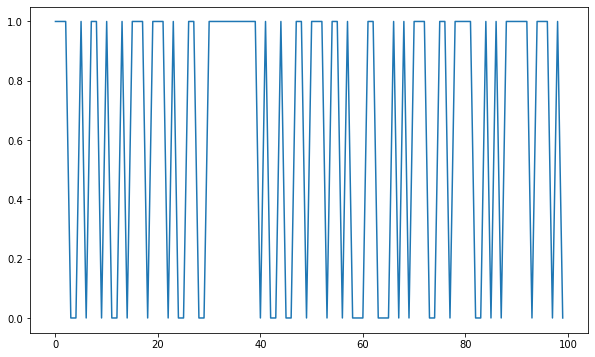

In [41]:
model.evaluate(x_test, y_test)
predict = model.predict(x_test)

predict_index = []
y_index = []
for p in predict:
    predict_index.append(np.argmax(p))
for y in y_test:
    y_index.append(np.argmax(y))
    
x = np.arange(100)
plt.figure(figsize = (10, 6))
p = []
for i in range(200, 300):
    p.append(predict_index[i] == y_index[i])
plt.plot(x, p)
plt.show()

In [43]:
loaded_model = tf.keras.models.load_model('model/my_model2.h5')

In [55]:
x_input_data = "TFT7_Bard TFT7_Braum TFT7_Lillia TFT7_Nunu TFT7_Olaf TFT7_Shen TFT7_Yasuo"
x_input_category = np.zeros((1, len(word_dic) + 1))
x_data_split = x_input_data.split(" ")
for xs in x_data_split:
    if xs != '':
        x_input_category[0][word_dic[xs]] = 1
predict_input = loaded_model.predict(x_input_category)
for i, p in enumerate(predict_input[0]):
    print(i, p)
print(np.argmax(predict_input[0]))

1/1 [==============================] - 0s 19ms/step
0 9.177512e-16
1 8.910279e-05
2 0.013631821
3 0.007726785
4 0.0007392361
5 0.003421252
6 2.2150229e-12
7 0.0011573487
8 0.0007239196
9 0.11044975
10 1.4934088e-05
11 0.0003053679
12 0.0026497433
13 9.068022e-05
14 0.00014472399
15 0.00045372162
16 0.0003484984
17 0.00026292156
18 7.360068e-07
19 0.00057646615
20 0.0008005165
21 0.00030412443
22 1.7377182e-06
23 0.00046332087
24 0.0004761594
25 0.005330955
26 0.00030537156
27 5.4941224e-06
28 0.00014285278
29 1.6277157e-06
30 0.0021486105
31 0.0011075583
32 0.004122662
33 0.0005066184
34 3.471132e-06
35 0.004942714
36 0.31760693
37 0.00043774504
38 0.003345248
39 0.0013809226
40 0.01404684
41 1.4063142e-05
42 0.00011056445
43 0.001322952
44 0.002808222
45 0.0011566111
46 1.0168145e-06
47 1.9247165e-05
48 0.00011731636
49 1.8916583e-06
50 0.0001015671
51 0.0022521303
52 0.0010291552
53 0.00014885324
54 0.00010167079
55 0.0007536674
56 0.0006141834
57 0.0050129574
58 0.48414516
59 2.0287

In [51]:
print(word_dic)

{'TFT7_Lulu': 1, 'TFT7_Sylas': 2, 'TFT7_Ornn': 3, 'TFT7_Bard': 4, 'TFT7_Yasuo': 5, 'TFT7_TrainerDragon': 6, 'TFT7_Nami': 7, 'TFT7_Zoe': 8, 'TFT7_Hecarim': 9, 'TFT7_Heimerdinger': 10, 'TFT7_Shen': 11, 'TFT7_Illaoi': 12, 'TFT7_Tristana': 13, 'TFT7_Neeko': 14, 'TFT7_Sona': 15, 'TFT7_Corki': 16, 'TFT7_Swain': 17, 'TFT7_Vladimir': 18, 'TFT7_Xayah': 19, 'TFT7_Soraka': 20, 'TFT7_Nunu': 21, 'TFT7_Ashe': 22, 'TFT7_DragonPurple': 23, 'TFT7_Lillia': 24, 'TFT7_Sejuani': 25, 'TFT7_Volibear': 26, 'TFT7_Anivia': 27, 'TFT7_Jinx': 28, 'TFT7_Gnar': 29, 'TFT7_DragonGold': 30, 'TFT7_Ryze': 31, 'TFT7_Pyke': 32, 'TFT7_Talon': 33, 'TFT7_Varus': 34, 'TFT7_LeeSin': 35, 'TFT7_Yone': 36, 'TFT7_Kayn': 37, 'TFT7_DragonBlue': 38, 'TFT7_DragonGreen': 39, 'TFT7_Thresh': 40, 'TFT7_Skarner': 41, 'TFT7_Sett': 42, 'TFT7_Twitch': 43, 'TFT7_Leona': 44, 'TFT7_Olaf': 45, 'TFT7_Nidalee': 46, 'TFT7_AurelionSol': 47, 'TFT7_Qiyana': 48, 'TFT7_Karma': 49, 'TFT7_Shyvana': 50, 'TFT7_Braum': 51, 'TFT7_TahmKench': 52, 'TFT7_Elise': 5